Jupyter Notebook that contains OLS models that are looking at the EAL, SOVI, and RESL scores

# PPOL 5203 Final Project

## Creating OLS Models

In [2]:
#!pip install openpyxl

In [34]:
import pandas as pd
import os
import openpyxl
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np
from scipy import stats as st

In [120]:
# import library for models
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import * # to imitate ggplot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from stargazer.stargazer import Stargazer, LineLocation
from IPython.core.display import HTML
from pystout import pystout

In [20]:
pwd

'/Users/katharynloweth/Desktop/Data_Science_I_Fall2023/PPOL5203_FinalProject'

In [4]:
#should be in the PPOL5203 folder not in subfolder
os.chdir("../")

In [21]:
Merged_County_Data_clean = pd.read_csv('Datasets/Clean_Data/NRI_county_health_data.csv', header=0)

In [11]:
Merged_County_Data_clean.columns

Index(['FIPS', 'STATEABBRV', 'State', 'County', 'County_State',
       'Community_Type', 'POPULATION', 'AREA', 'Population_Density',
       'Percent_Rural', 'RISK_SCORE', 'RISK_RATNG', 'EAL_SCORE', 'EAL_RATNG',
       'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE', 'RESL_RATNG',
       'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'Life_Expectancy',
       'Age-Adjusted_Death_Rate', 'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Percent_Less_than_18_Years_of_Age',
       'Percent_65_and_Over', 'Percent_Non-Hispanic_White', 'Percent_Femal

In [25]:
Merged_County_Data_clean["RISK_SCORE_SQ"] = Merged_County_Data_clean["RISK_SCORE"]**2

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## Risk Score Broken into Components

In [94]:
life_ex_model_ols_r = smf.ols(formula='Life_Expectancy ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE', data=Merged_County_Data_clean).fit()

print(life_ex_model_ols_r.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     471.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          6.32e-252
Time:                        16:37:00   Log-Likelihood:                -7409.3
No. Observations:                3071   AIC:                         1.483e+04
Df Residuals:                    3067   BIC:                         1.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.6476      0.197    399.612      0.0

In [95]:
life_ex_model_ols_r2 = smf.ols(formula='Life_Expectancy ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=Merged_County_Data_clean).fit()

print(life_ex_model_ols_r2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     269.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.17e-277
Time:                        16:37:38   Log-Likelihood:                -7340.7
No. Observations:                3071   AIC:                         1.470e+04
Df Residuals:                    3064   BIC:                         1.474e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [96]:
model_ols_r_allscores_mh = smf.ols(formula='Average_Number_of_Mentally_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=Merged_County_Data_clean).fit()

print(model_ols_r_allscores_mh.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Average_Number_of_Mentally_Unhealthy_Days   R-squared:                       0.203
Model:                                                   OLS   Adj. R-squared:                  0.201
Method:                                        Least Squares   F-statistic:                     132.7
Date:                                       Thu, 30 Nov 2023   Prob (F-statistic):          4.55e-150
Time:                                               16:38:57   Log-Likelihood:                -2636.9
No. Observations:                                       3140   AIC:                             5288.
Df Residuals:                                           3133   BIC:                             5330.
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                      

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


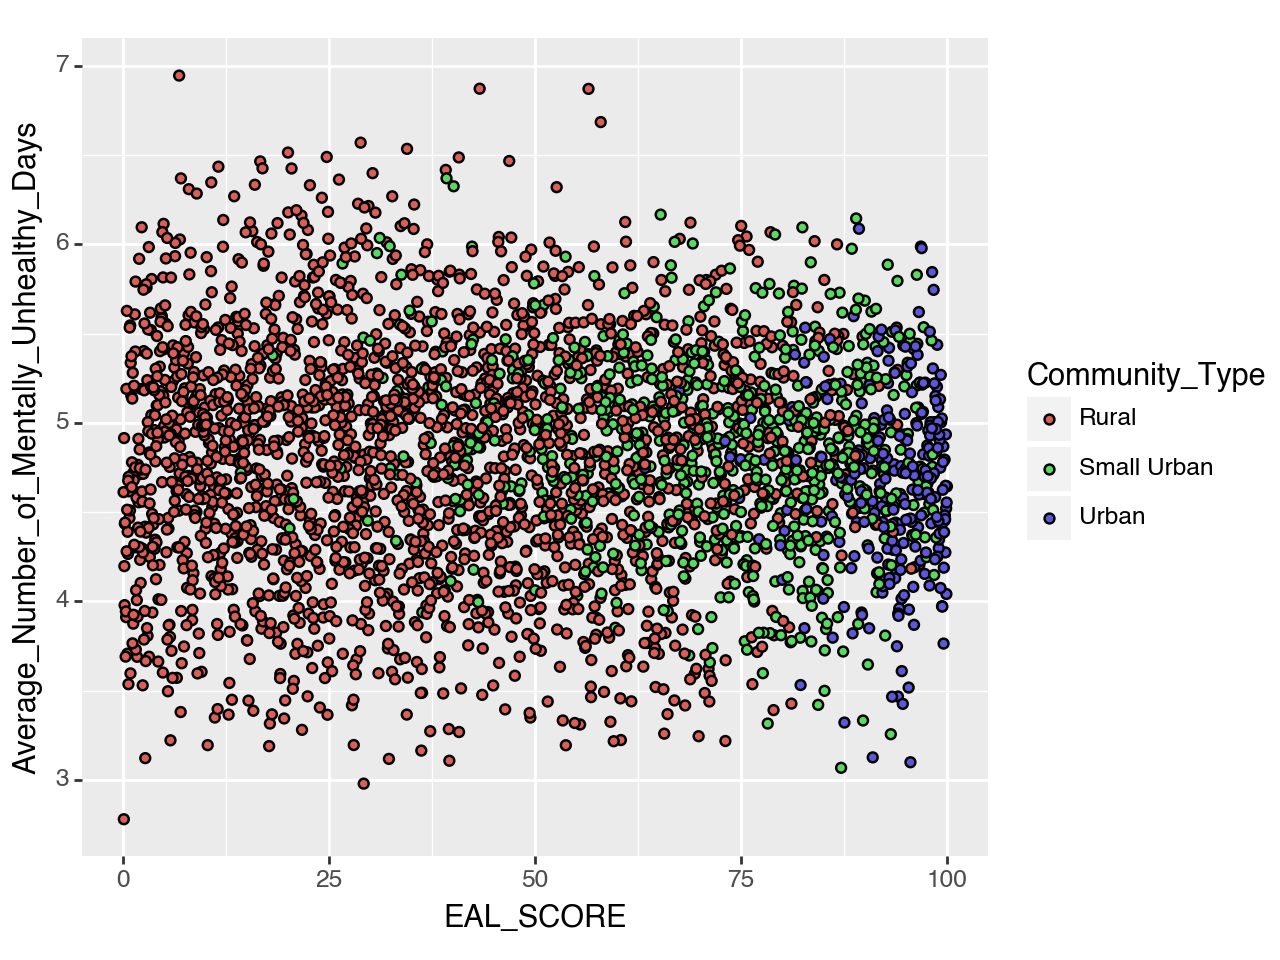

<Figure Size: (640 x 480)>

In [108]:
(ggplot(Merged_County_Data_clean) + aes(x = 'EAL_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


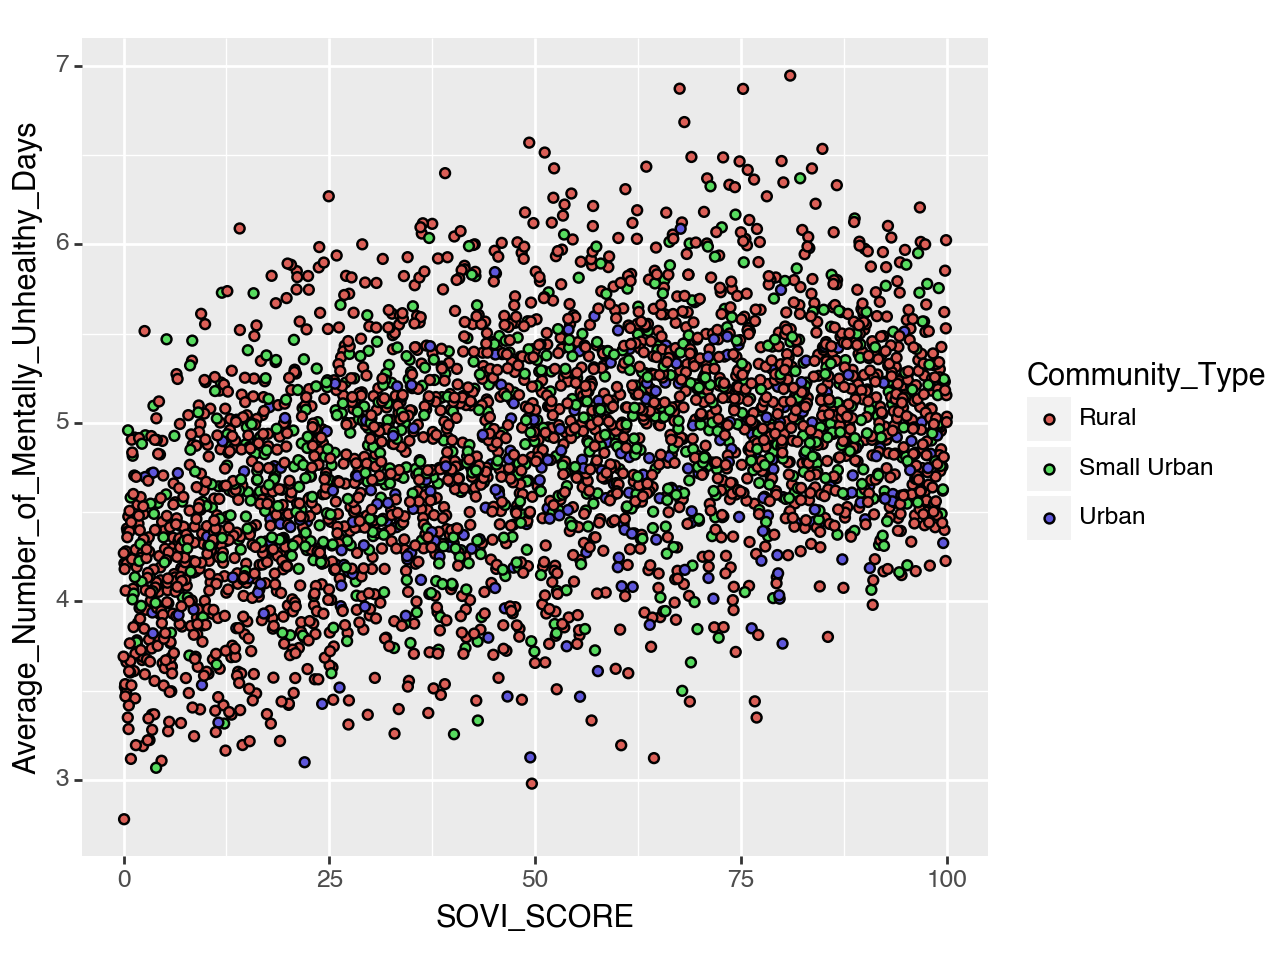

<Figure Size: (640 x 480)>

In [106]:
(ggplot(Merged_County_Data_clean) + aes(x = 'SOVI_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


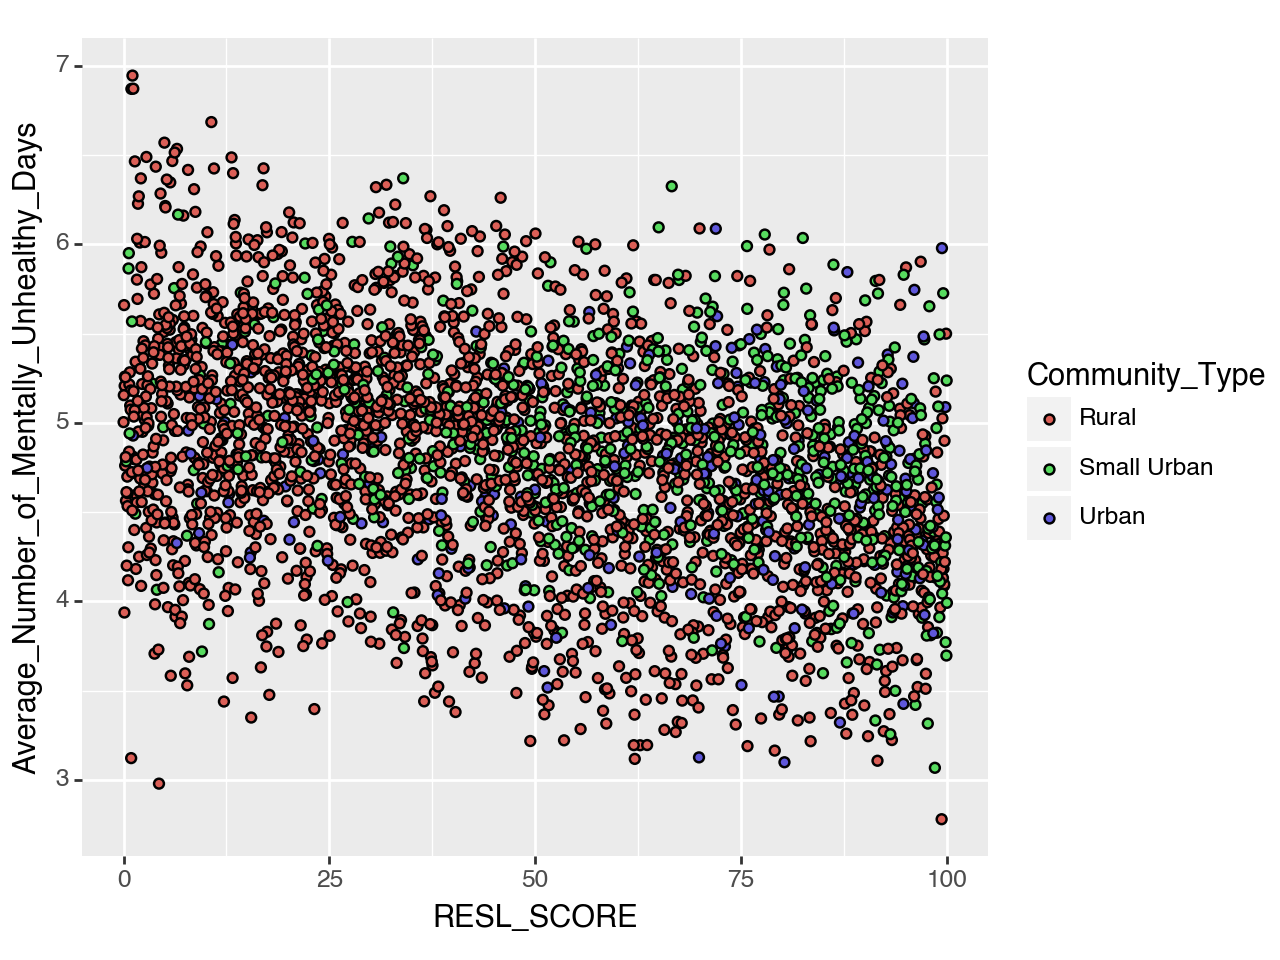

<Figure Size: (640 x 480)>

In [107]:
(ggplot(Merged_County_Data_clean) + aes(x = 'RESL_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

In [97]:
model_ols_r_allscores_ph = smf.ols(formula='Average_Number_of_Physically_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=Merged_County_Data_clean).fit()

print(model_ols_r_allscores_ph.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Average_Number_of_Physically_Unhealthy_Days   R-squared:                       0.552
Model:                                                     OLS   Adj. R-squared:                  0.552
Method:                                          Least Squares   F-statistic:                     644.4
Date:                                         Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                                                 16:39:34   Log-Likelihood:                -1849.6
No. Observations:                                         3140   AIC:                             3713.
Df Residuals:                                             3133   BIC:                             3756.
Df Model:                                                    6                                         
Covariance Type:                                     nonrobust  

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


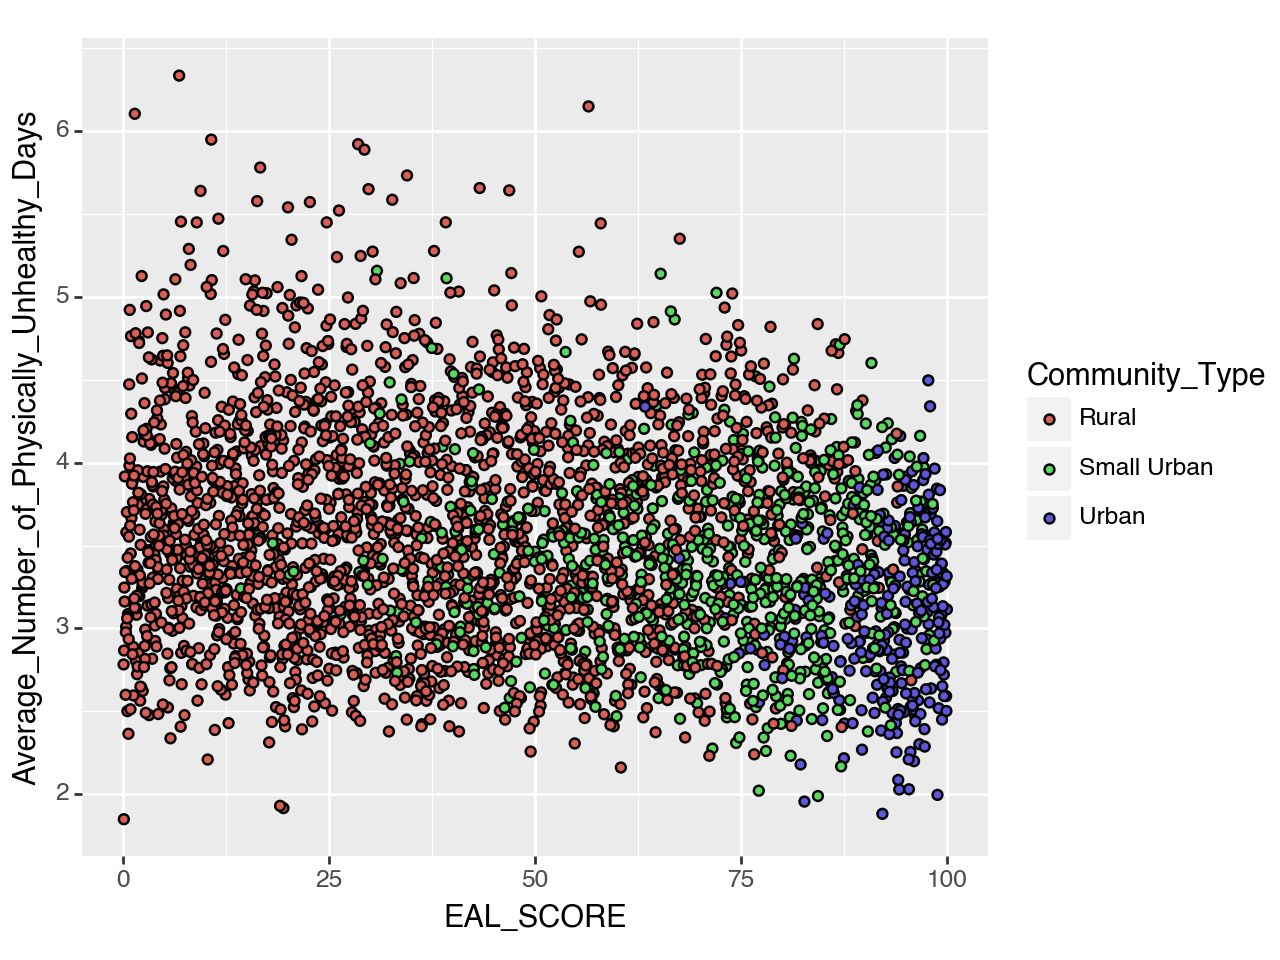

<Figure Size: (640 x 480)>

In [109]:
(ggplot(Merged_County_Data_clean) + aes(x = 'EAL_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


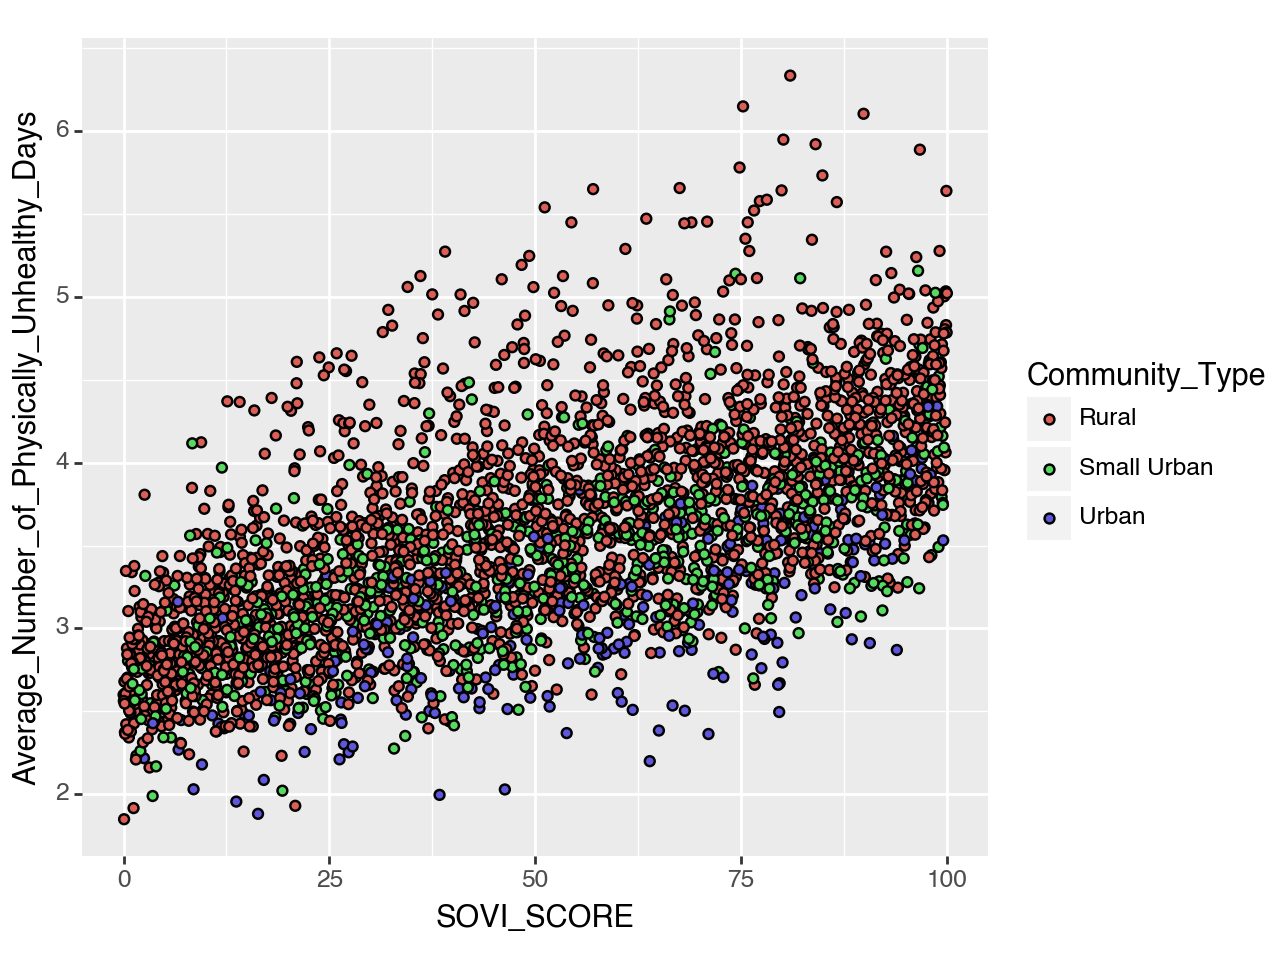

<Figure Size: (640 x 480)>

In [105]:
(ggplot(Merged_County_Data_clean) + aes(x = 'SOVI_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


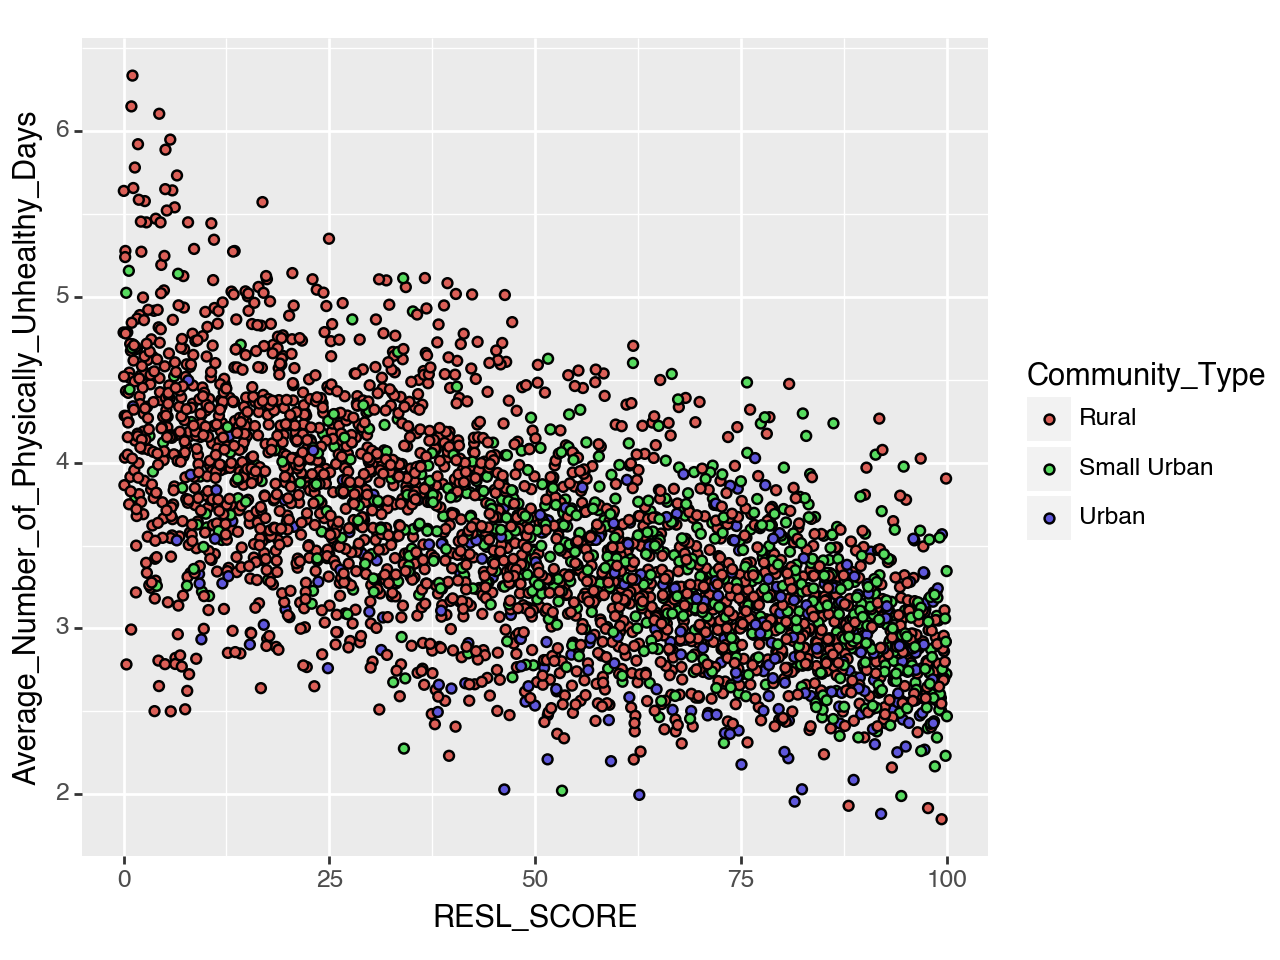

<Figure Size: (640 x 480)>

In [104]:
(ggplot(Merged_County_Data_clean) + aes(x = 'RESL_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

# Southeast Breakdown of Scores

In [6]:
Southeast_county_data = pd.read_csv('Datasets/Clean_Data/NRI_county_health_data_southeast.csv', header=0)

In [27]:
Southeast_county_data.columns

Index(['FIPS', 'STATEABBRV', 'State', 'County', 'County_State',
       'Community_Type', 'POPULATION', 'AREA', 'Population_Density',
       'Percent_Rural', 'RISK_SCORE', 'RISK_RATNG', 'EAL_SCORE', 'EAL_RATNG',
       'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE', 'RESL_RATNG',
       'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'Life_Expectancy',
       'Age_Adjusted_Death_Rate', 'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Percent_Less_than_18_Years_of_Age',
       'Percent_65_and_Over', 'Percent_Non_Hispanic_White', 'Percent_Femal

**Age Adjusted Death Rate**

In [119]:
model_ols_r_allscores_drate= smf.ols(formula='Age_Adjusted_Death_Rate ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_drate.summary())

                               OLS Regression Results                              
Dep. Variable:     Age_Adjusted_Death_Rate   R-squared:                       0.468
Model:                                 OLS   Adj. R-squared:                  0.465
Method:                      Least Squares   F-statistic:                     134.4
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):          5.04e-122
Time:                             20:03:52   Log-Likelihood:                -5478.6
No. Observations:                      924   AIC:                         1.097e+04
Df Residuals:                          917   BIC:                         1.100e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [124]:
SE['EAL_SQ'] = SE['EAL_SCORE']**2

In [140]:
SE['SOVI_SQ'] = SE['SOVI_SCORE']**2
SE['RESL_INV'] = SE['RESL_SCORE'] ** -1

In [134]:
#with squared terms for EAL and SOVI
model_ols_r_allscores_drate_sq= smf.ols(formula='Age_Adjusted_Death_Rate ~ EAL_SCORE + EAL_SQ + SOVI_SCORE + SOVI_SQ + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_drate_sq.summary())
#EAL SQ matters but SOVI SQ does not

                               OLS Regression Results                              
Dep. Variable:     Age_Adjusted_Death_Rate   R-squared:                       0.473
Model:                                 OLS   Adj. R-squared:                  0.469
Method:                      Least Squares   F-statistic:                     102.8
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):          6.17e-122
Time:                             20:50:41   Log-Likelihood:                -5473.8
No. Observations:                      924   AIC:                         1.097e+04
Df Residuals:                          915   BIC:                         1.101e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

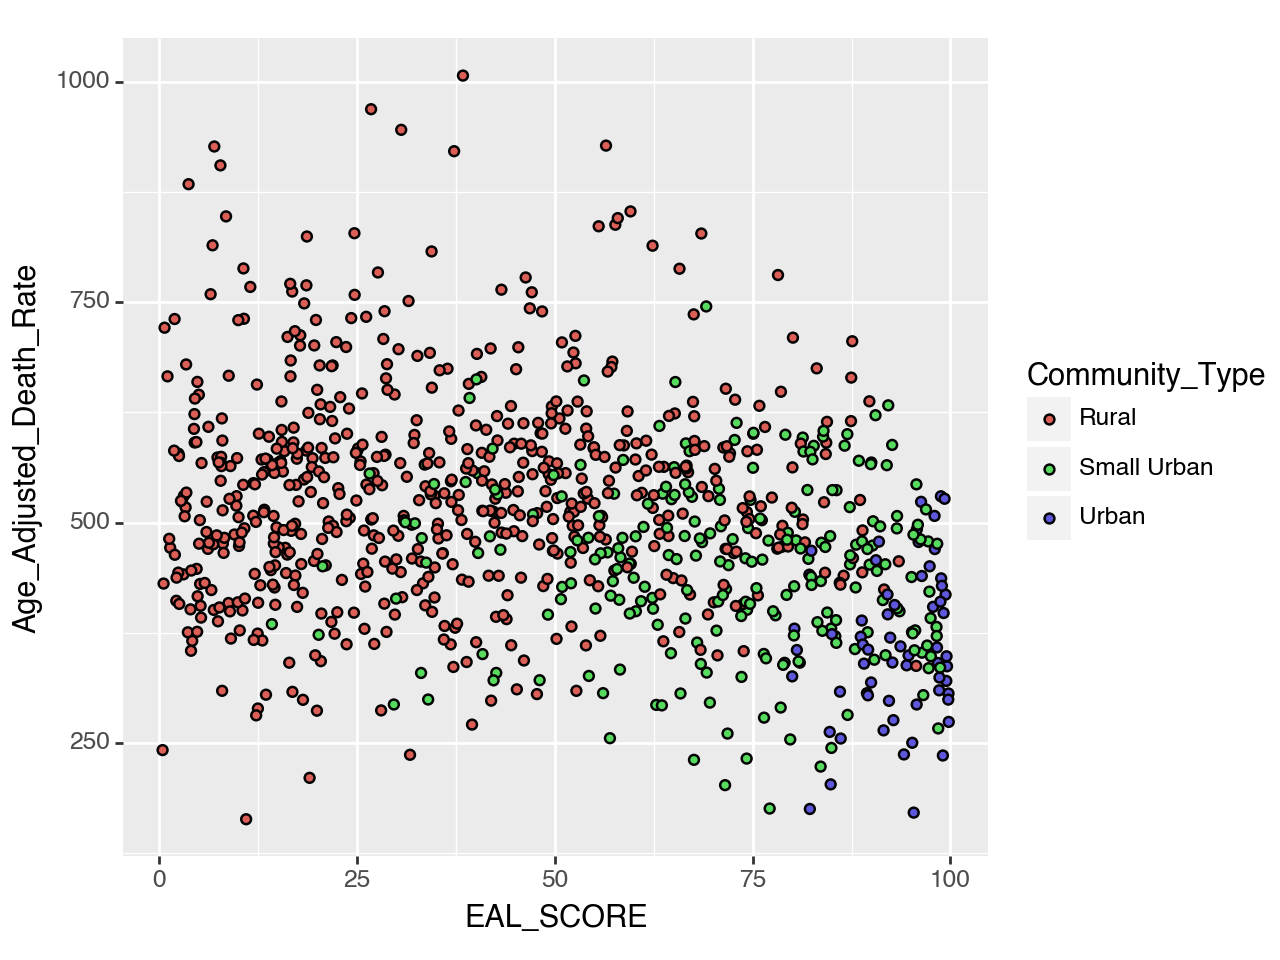

<Figure Size: (640 x 480)>

In [120]:
(ggplot(SE) + aes(x = 'EAL_SCORE', y = 'Age_Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

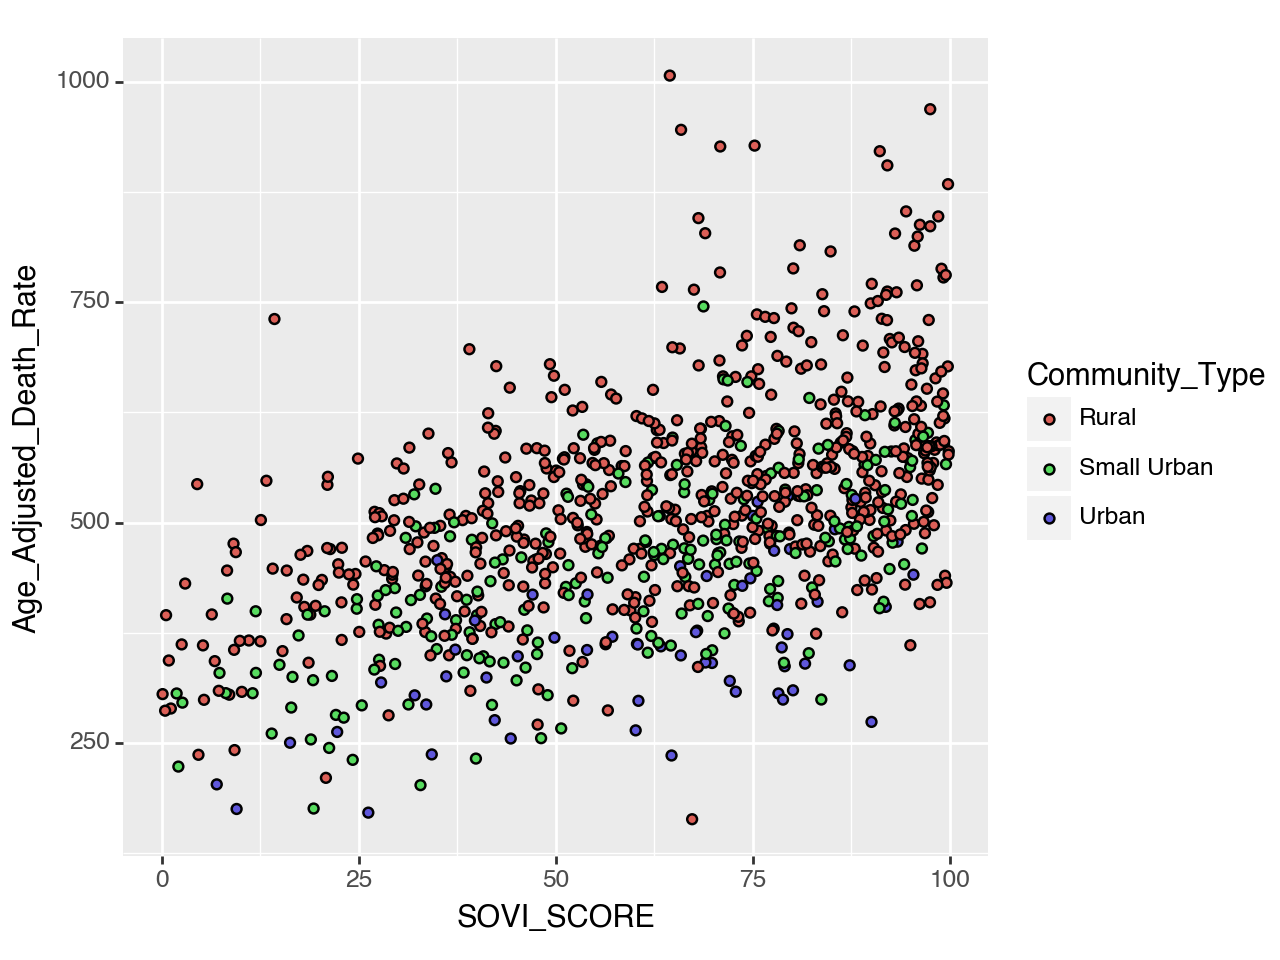

<Figure Size: (640 x 480)>

In [121]:
(ggplot(SE) + aes(x = 'SOVI_SCORE', y = 'Age_Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

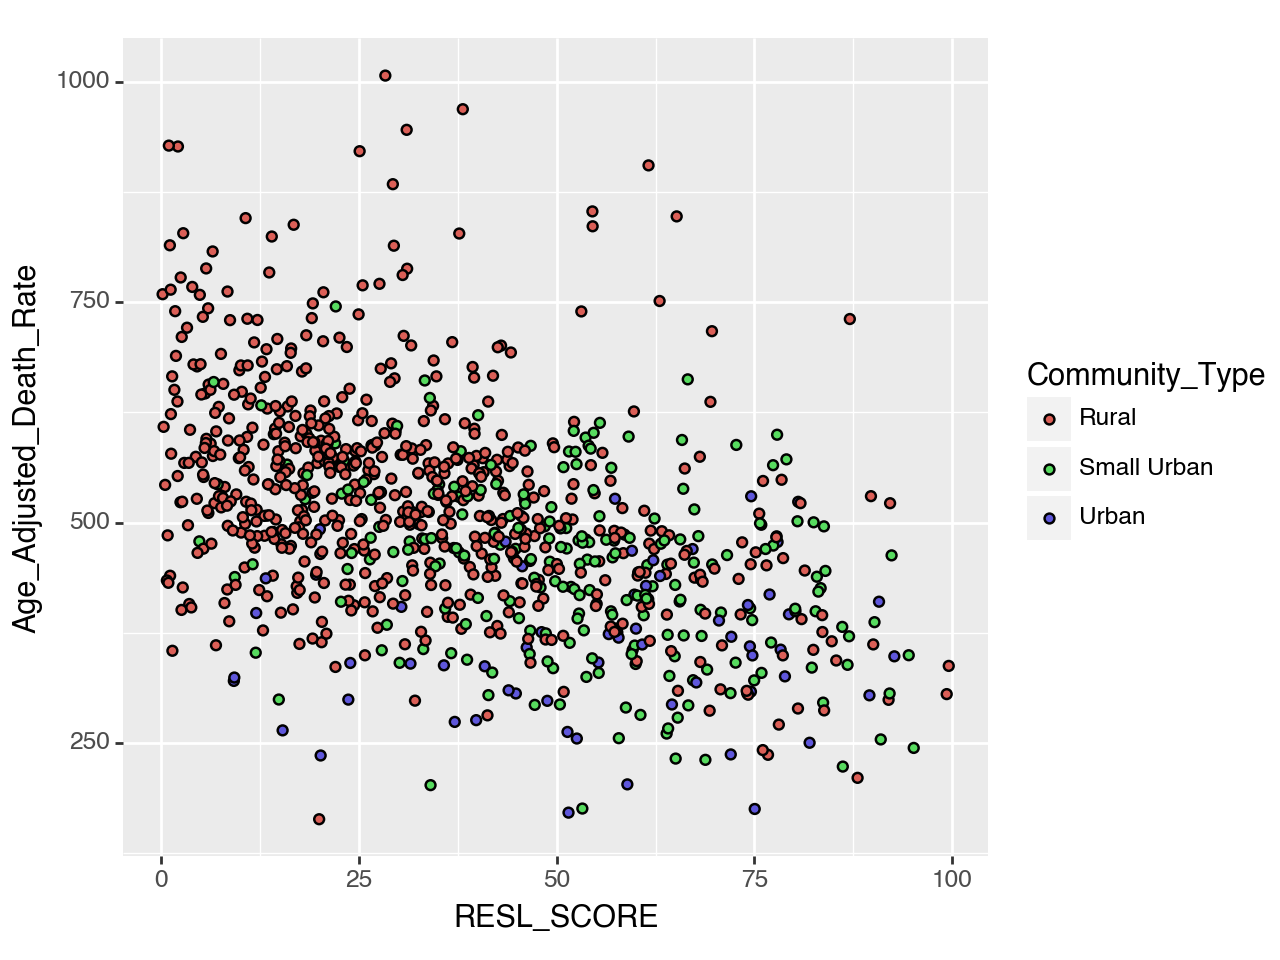

<Figure Size: (640 x 480)>

In [122]:
(ggplot(SE) + aes(x = 'RESL_SCORE', y = 'Age_Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

**Life Expectancy**

In [123]:
model_ols_r_allscores_lifeexp= smf.ols(formula='Life_Expectancy ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_lifeexp.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     105.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.51e-100
Time:                        20:35:47   Log-Likelihood:                -2059.6
No. Observations:                 922   AIC:                             4133.
Df Residuals:                     915   BIC:                             4167.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Mentally Unhealthy Days**

In [116]:
model_ols_r_allscores_mh = smf.ols(formula='Average_Number_of_Mentally_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_mh.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Average_Number_of_Mentally_Unhealthy_Days   R-squared:                       0.194
Model:                                                   OLS   Adj. R-squared:                  0.188
Method:                                        Least Squares   F-statistic:                     36.72
Date:                                       Thu, 30 Nov 2023   Prob (F-statistic):           5.36e-40
Time:                                               20:00:28   Log-Likelihood:                -698.13
No. Observations:                                        924   AIC:                             1410.
Df Residuals:                                            917   BIC:                             1444.
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                      

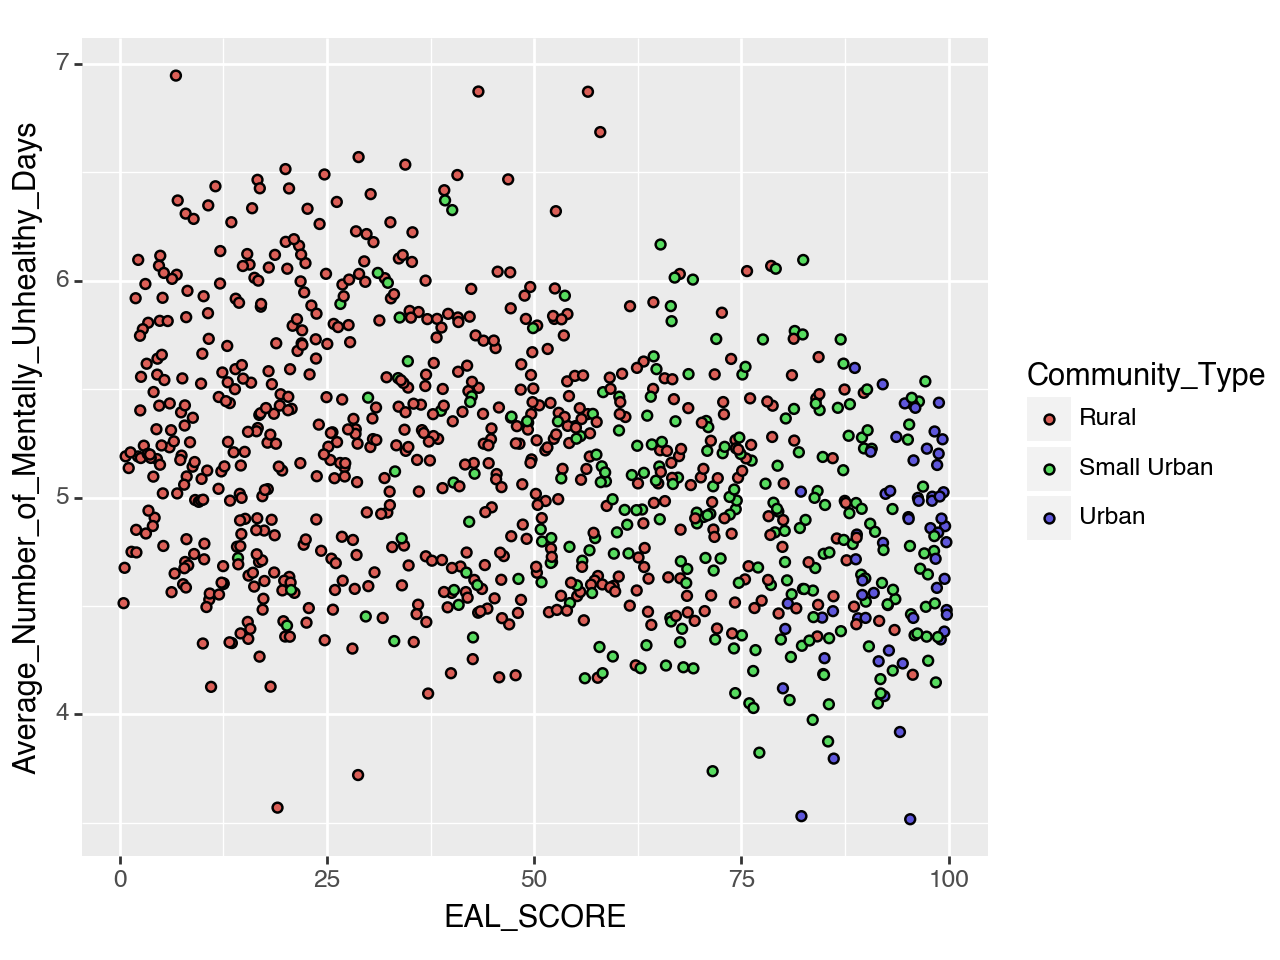

<Figure Size: (640 x 480)>

In [111]:
(ggplot(SE) + aes(x = 'EAL_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

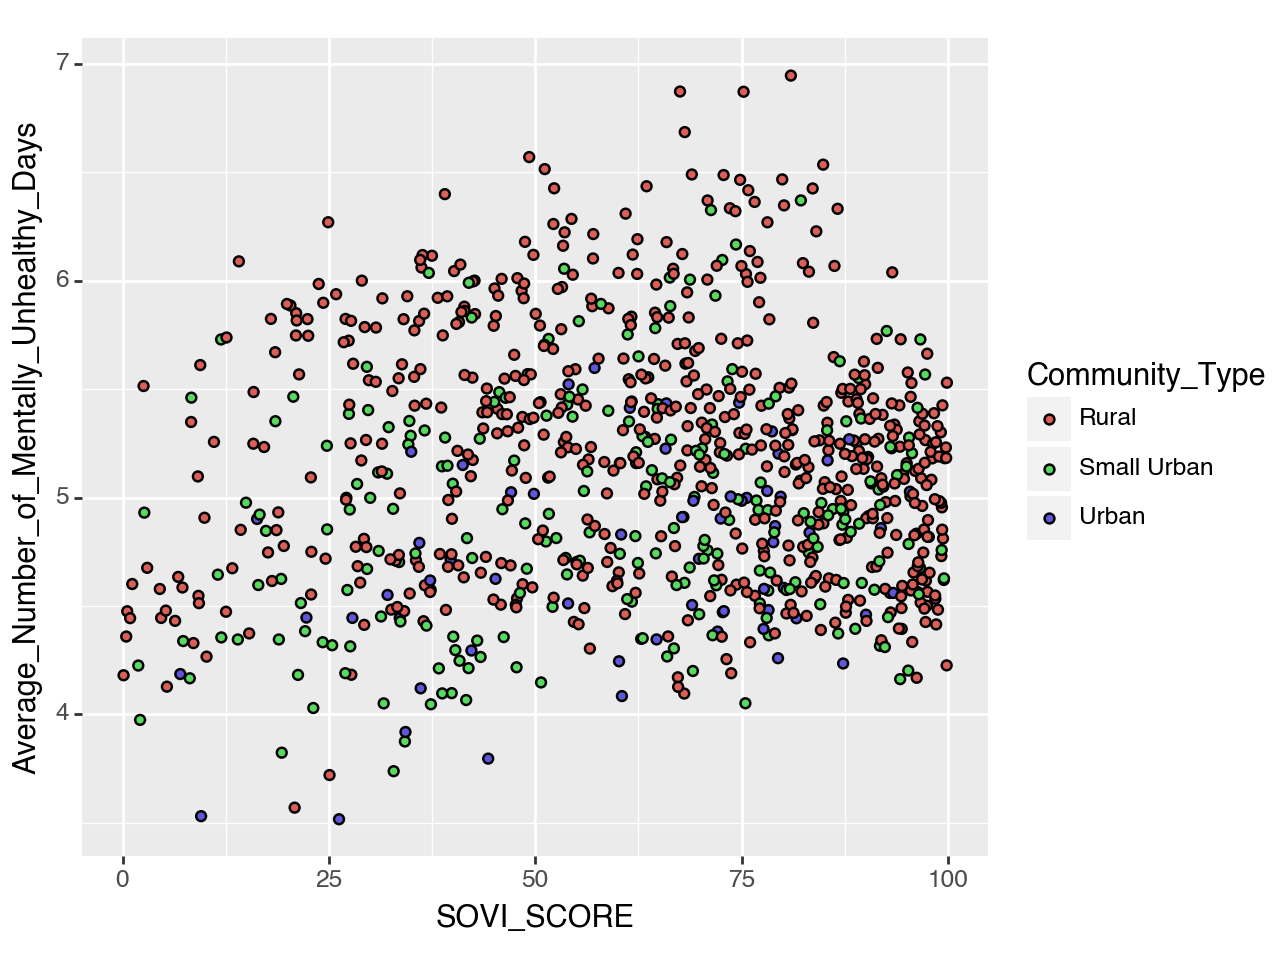

<Figure Size: (640 x 480)>

In [112]:
(ggplot(SE) + aes(x = 'SOVI_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

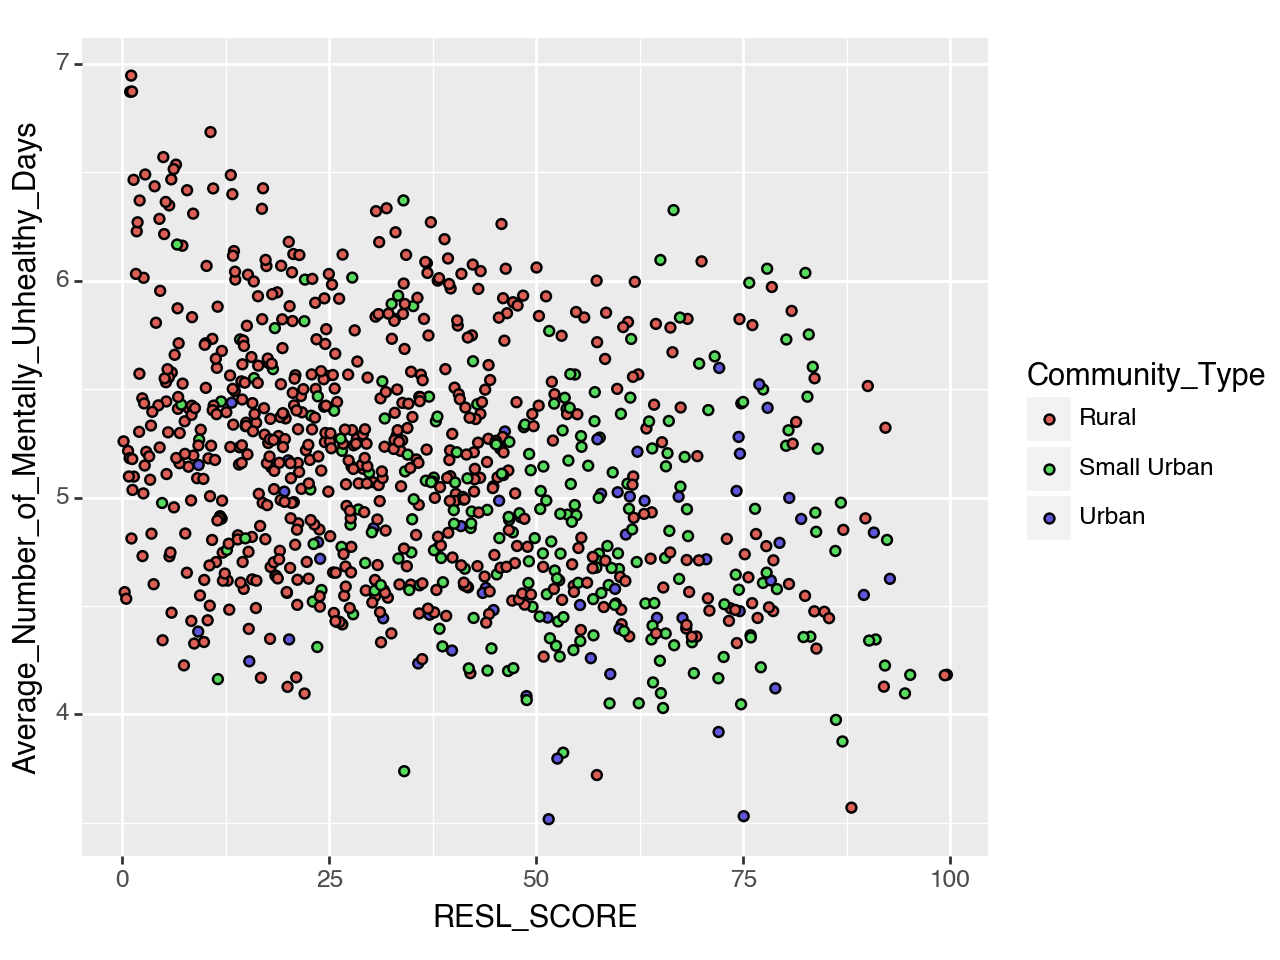

<Figure Size: (640 x 480)>

In [113]:
(ggplot(SE) + aes(x = 'RESL_SCORE', y = 'Average_Number_of_Mentally_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

In [132]:
#with sq SOVI variable
model_ols_r_allscores_mhsq1 = smf.ols(formula='Average_Number_of_Mentally_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + SOVI_SQ + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_mhsq1.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Average_Number_of_Mentally_Unhealthy_Days   R-squared:                       0.245
Model:                                                   OLS   Adj. R-squared:                  0.240
Method:                                        Least Squares   F-statistic:                     42.56
Date:                                       Thu, 30 Nov 2023   Prob (F-statistic):           4.00e-52
Time:                                               20:44:53   Log-Likelihood:                -667.51
No. Observations:                                        924   AIC:                             1351.
Df Residuals:                                            916   BIC:                             1390.
Df Model:                                                  7                                         
Covariance Type:                                   nonrobust                      

In [183]:
#with sq sovi and eal variables
model_ols_r_allscores_mhsq2 = smf.ols(formula='Average_Number_of_Mentally_Unhealthy_Days ~ EAL_SCORE + EAL_SQ + SOVI_SCORE + SOVI_SQ + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_mhsq2.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Average_Number_of_Mentally_Unhealthy_Days   R-squared:                       0.249
Model:                                                   OLS   Adj. R-squared:                  0.242
Method:                                        Least Squares   F-statistic:                     37.91
Date:                                       Thu, 30 Nov 2023   Prob (F-statistic):           3.33e-52
Time:                                               21:56:35   Log-Likelihood:                -665.35
No. Observations:                                        924   AIC:                             1349.
Df Residuals:                                            915   BIC:                             1392.
Df Model:                                                  8                                         
Covariance Type:                                   nonrobust                      

**Physically Unhealthy Days**

In [117]:
model_ols_r_allscores_ph = smf.ols(formula='Average_Number_of_Physically_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_ph.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Average_Number_of_Physically_Unhealthy_Days   R-squared:                       0.409
Model:                                                     OLS   Adj. R-squared:                  0.405
Method:                                          Least Squares   F-statistic:                     105.6
Date:                                         Thu, 30 Nov 2023   Prob (F-statistic):          4.29e-101
Time:                                                 20:00:42   Log-Likelihood:                -680.90
No. Observations:                                          924   AIC:                             1376.
Df Residuals:                                              917   BIC:                             1410.
Df Model:                                                    6                                         
Covariance Type:                                     nonrobust  

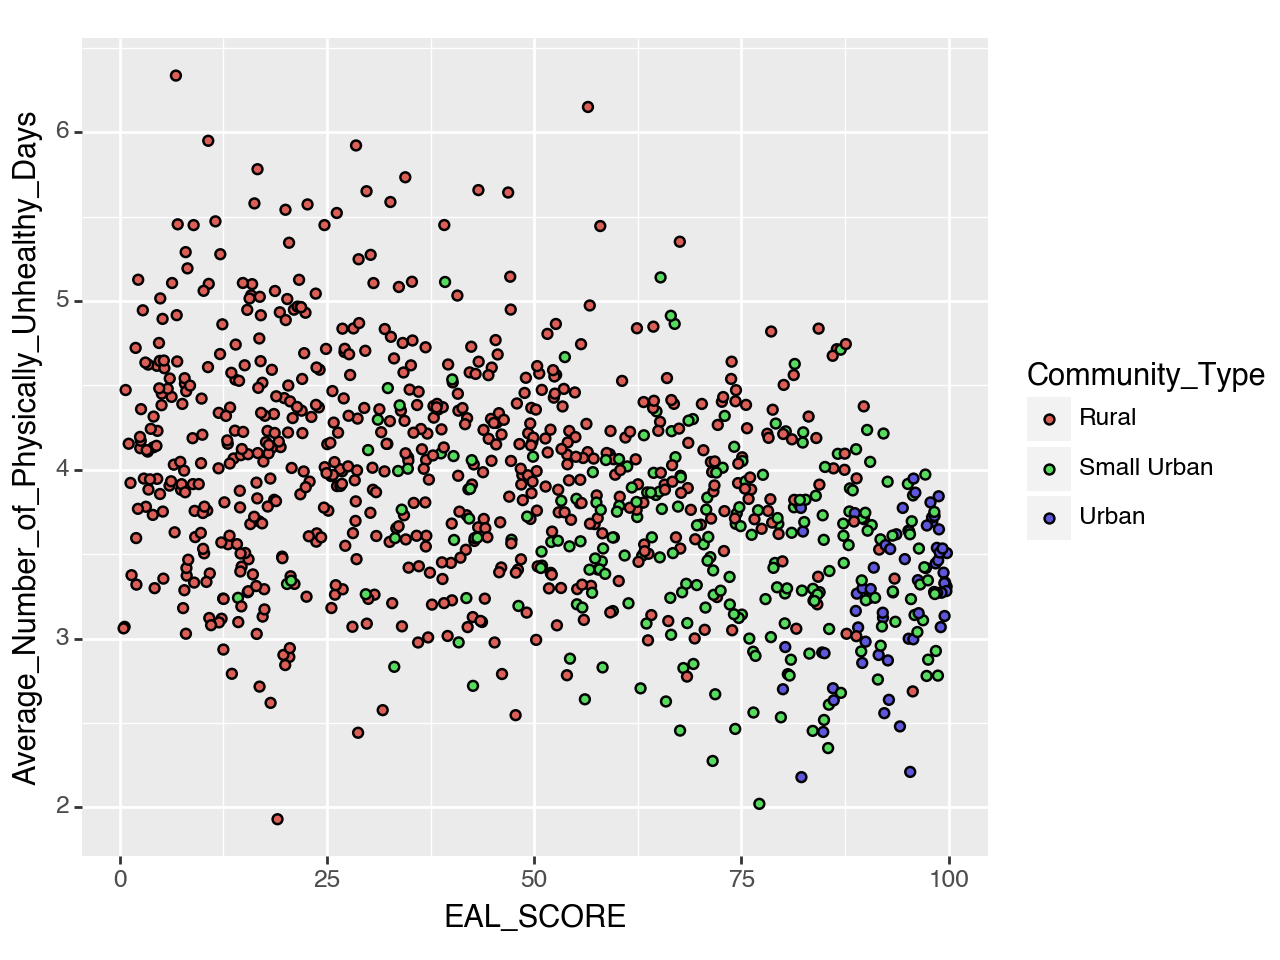

<Figure Size: (640 x 480)>

In [110]:
(ggplot(SE) + aes(x = 'EAL_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

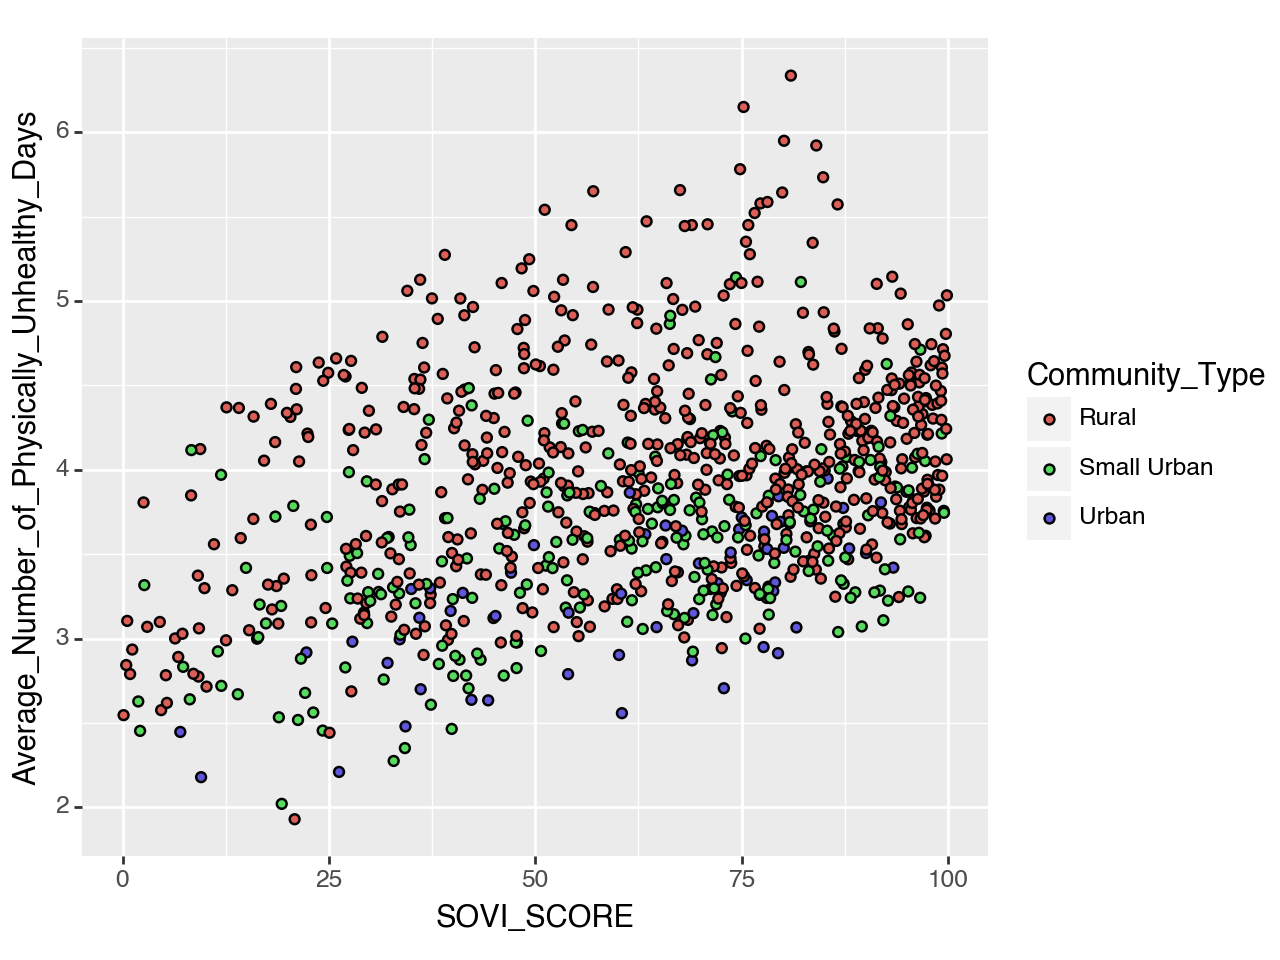

<Figure Size: (640 x 480)>

In [102]:
(ggplot(SE) + aes(x = 'SOVI_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

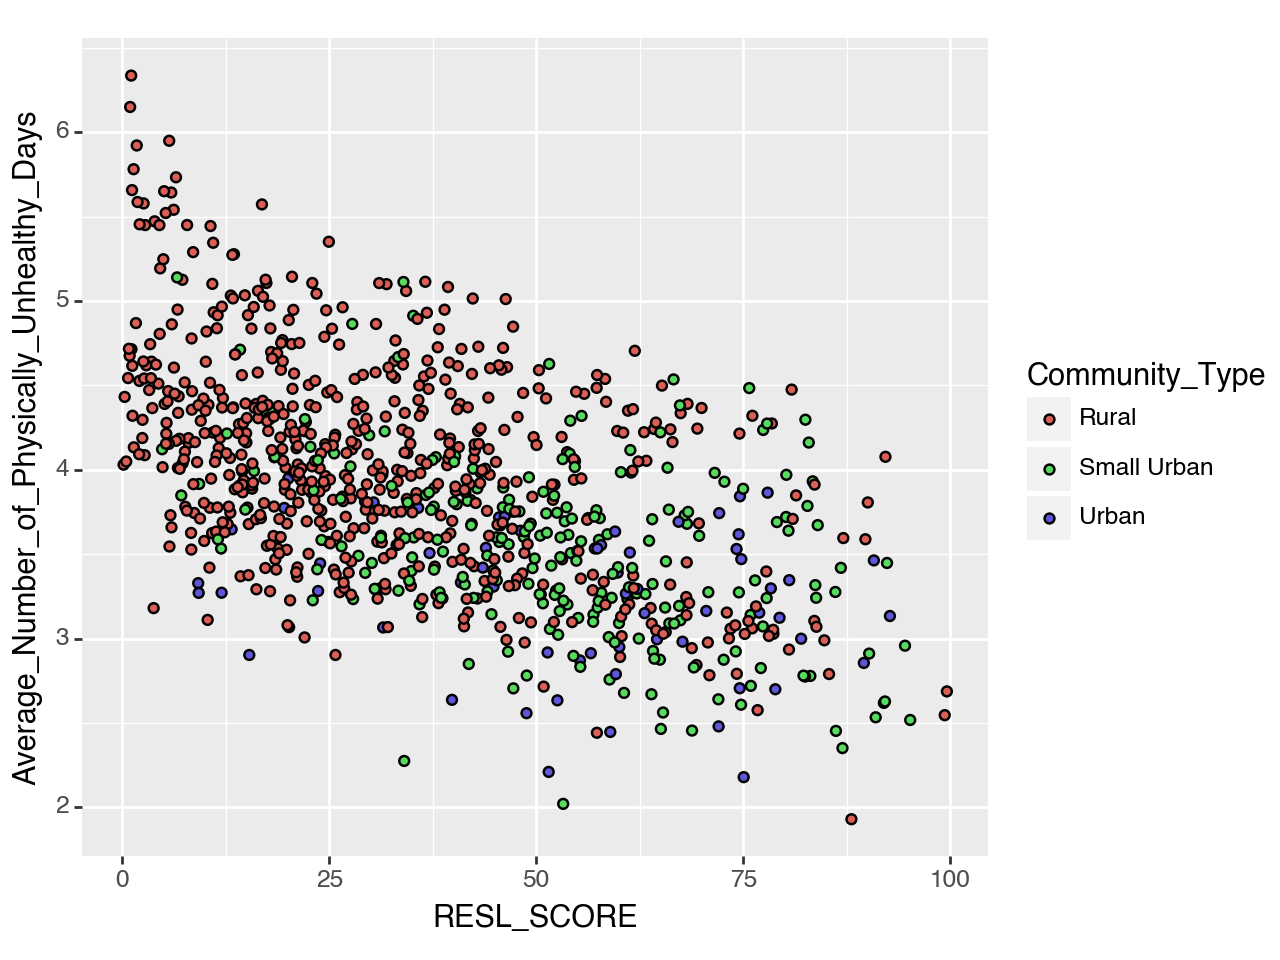

<Figure Size: (640 x 480)>

In [101]:
(ggplot(SE) + aes(x = 'RESL_SCORE', y = 'Average_Number_of_Physically_Unhealthy_Days', fill = "Community_Type") 
 + geom_point())

In [136]:
model_ols_r_allscores_ph2 = smf.ols(formula='Average_Number_of_Physically_Unhealthy_Days ~ EAL_SCORE + EAL_SQ + SOVI_SCORE + RESL_SCORE + Community_Type + Population_Density', data=SE).fit()

print(model_ols_r_allscores_ph2.summary())

#squared version of EAL makes variable not statistically significant

                                         OLS Regression Results                                        
Dep. Variable:     Average_Number_of_Physically_Unhealthy_Days   R-squared:                       0.409
Model:                                                     OLS   Adj. R-squared:                  0.405
Method:                                          Least Squares   F-statistic:                     90.64
Date:                                         Thu, 30 Nov 2023   Prob (F-statistic):          3.02e-100
Time:                                                 20:57:23   Log-Likelihood:                -680.47
No. Observations:                                          924   AIC:                             1377.
Df Residuals:                                              916   BIC:                             1416.
Df Model:                                                    7                                         
Covariance Type:                                     nonrobust  

## No RESL Score in Model

In [126]:
model_ols_r_noresl_lifeexp= smf.ols(formula='Life_Expectancy ~ EAL_SCORE + SOVI_SCORE + Community_Type + Population_Density + Primary_Care_Physicians_Rate + Mental_Health_Provider_Rate', data=SE).fit()

print(model_ols_r_noresl_lifeexp.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     99.53
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          4.27e-106
Time:                        20:39:18   Log-Likelihood:                -1865.6
No. Observations:                 860   AIC:                             3747.
Df Residuals:                     852   BIC:                             3785.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [130]:
model_ols_r_noresl_drate = smf.ols(formula='Age_Adjusted_Death_Rate ~ EAL_SCORE + EAL_SQ + SOVI_SCORE + Community_Type + Population_Density + Primary_Care_Physicians_Rate + Mental_Health_Provider_Rate', data=SE).fit()

print(model_ols_r_noresl_drate.summary())

                               OLS Regression Results                              
Dep. Variable:     Age_Adjusted_Death_Rate   R-squared:                       0.491
Model:                                 OLS   Adj. R-squared:                  0.487
Method:                      Least Squares   F-statistic:                     102.8
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):          1.85e-119
Time:                             20:42:05   Log-Likelihood:                -5070.6
No. Observations:                      860   AIC:                         1.016e+04
Df Residuals:                          851   BIC:                         1.020e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [128]:
model_ols_r_noresl_mh = smf.ols(formula='Average_Number_of_Mentally_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + Community_Type + Population_Density + Primary_Care_Physicians_Rate + Mental_Health_Provider_Rate', data=SE).fit()

print(model_ols_r_noresl_mh.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Average_Number_of_Mentally_Unhealthy_Days   R-squared:                       0.174
Model:                                                   OLS   Adj. R-squared:                  0.168
Method:                                        Least Squares   F-statistic:                     25.70
Date:                                       Thu, 30 Nov 2023   Prob (F-statistic):           5.30e-32
Time:                                               20:40:44   Log-Likelihood:                -670.64
No. Observations:                                        860   AIC:                             1357.
Df Residuals:                                            852   BIC:                             1395.
Df Model:                                                  7                                         
Covariance Type:                                   nonrobust                      

In [129]:
model_ols_r_noresl_ph = smf.ols(formula='Average_Number_of_Physically_Unhealthy_Days ~ EAL_SCORE + SOVI_SCORE + Community_Type + Population_Density + Primary_Care_Physicians_Rate + Mental_Health_Provider_Rate', data=SE).fit()

print(model_ols_r_noresl_ph.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Average_Number_of_Physically_Unhealthy_Days   R-squared:                       0.372
Model:                                                     OLS   Adj. R-squared:                  0.367
Method:                                          Least Squares   F-statistic:                     72.25
Date:                                         Thu, 30 Nov 2023   Prob (F-statistic):           6.00e-82
Time:                                                 20:41:24   Log-Likelihood:                -668.53
No. Observations:                                          860   AIC:                             1353.
Df Residuals:                                              852   BIC:                             1391.
Df Model:                                                    7                                         
Covariance Type:                                     nonrobust  